In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib import cm

import analysis_fcns

import glob
import rasterio

# get the num of cases in ./cases
cases = glob.glob('./cases/*')
num_cases = len(cases)

In [2]:
analysis_fcns.print_all_cases_info(num_cases)

Case 1 path: ./cases/case_1
./cases/case_1/flin_0000001_0022380.tif: shape=(128, 128), min=-9999.0, max=0.0
./cases/case_1/time_of_arrival_0000001_0022380.tif: shape=(128, 128), min=-9999.0, max=30.0
./cases/case_1/vs_0000001_0022380.tif: shape=(128, 128), min=-9999.0, max=7.449957317717804e-11
Case 2 path: ./cases/case_2
./cases/case_2/flin_0000001_0022380.tif: shape=(128, 128), min=-9999.0, max=-9999.0
./cases/case_2/time_of_arrival_0000001_0022380.tif: shape=(128, 128), min=-9999.0, max=-9999.0
./cases/case_2/vs_0000001_0022380.tif: shape=(128, 128), min=-9999.0, max=-9999.0
Case 3 path: ./cases/case_3
./cases/case_3/flin_0000001_0022380.tif: shape=(128, 128), min=-9999.0, max=-9999.0
./cases/case_3/time_of_arrival_0000001_0022380.tif: shape=(128, 128), min=-9999.0, max=-9999.0
./cases/case_3/vs_0000001_0022380.tif: shape=(128, 128), min=-9999.0, max=-9999.0
Case 4 path: ./cases/case_4
./cases/case_4/flin_0000001_0022119.tif: shape=(128, 128), min=-9999.0, max=1861.9949951171875
./c

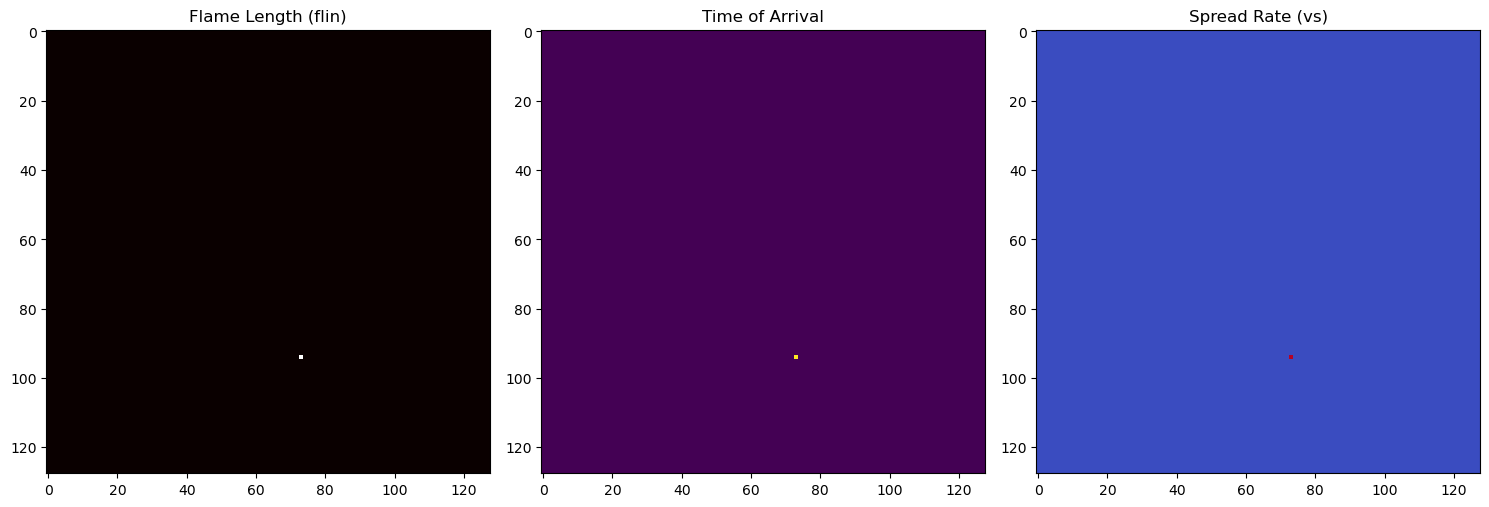

In [3]:
analysis_fcns.plot_case(1)

Plotting all cases for raster pattern: flin_*.tif


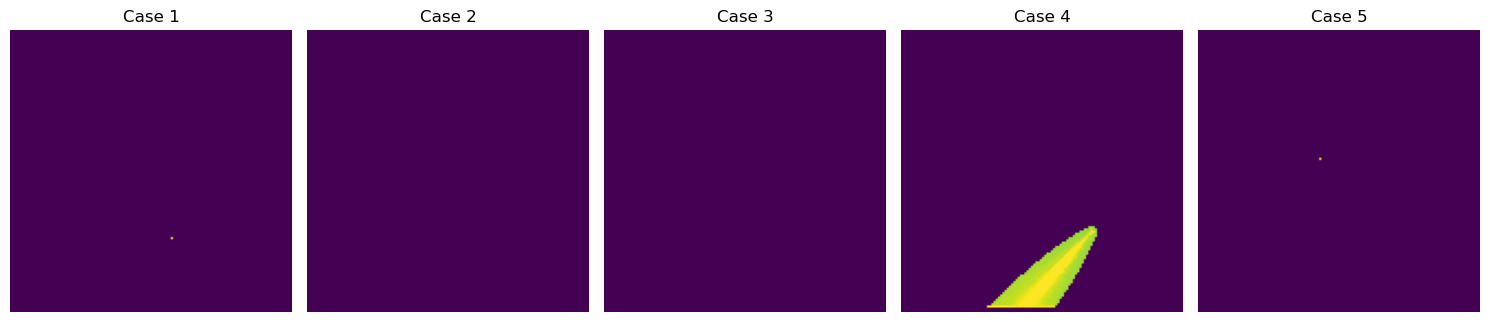

In [5]:
patterns = ["flin_*.tif", "time_of_arrival_*.tif", "vs_*.tif"]
analysis_fcns.plot_all_cases_raster('flin_*.tif', num_cases)

Input parameters distribution from input_tracking.txt:
            run        xign        yign       fuel        slp        asp  \
count  5.000000    5.000000    5.000000   5.000000   5.000000    5.00000   
mean   3.000000  372.360000 -371.520000  15.000000  22.600000  251.60000   
std    1.581139  380.751458  643.592066  12.747549  19.969977  124.66074   
min    1.000000 -241.300000 -929.600000   1.000000   5.000000   47.00000   
25%    2.000000  282.200000 -786.000000   8.000000   5.000000  218.00000   
50%    3.000000  466.500000 -785.700000   9.000000  15.000000  318.00000   
75%    4.000000  662.000000  179.500000  27.000000  43.000000  336.00000   
max    5.000000  692.400000  464.200000  30.000000  45.000000  339.00000   

              ws          wd         m1        m10      m100         cc  \
count   5.000000    5.000000   5.000000   5.000000   5.00000   5.000000   
mean   14.180000  129.800000  23.380000  17.500000  15.44000  54.000000   
std     8.502176  111.688764  12.72

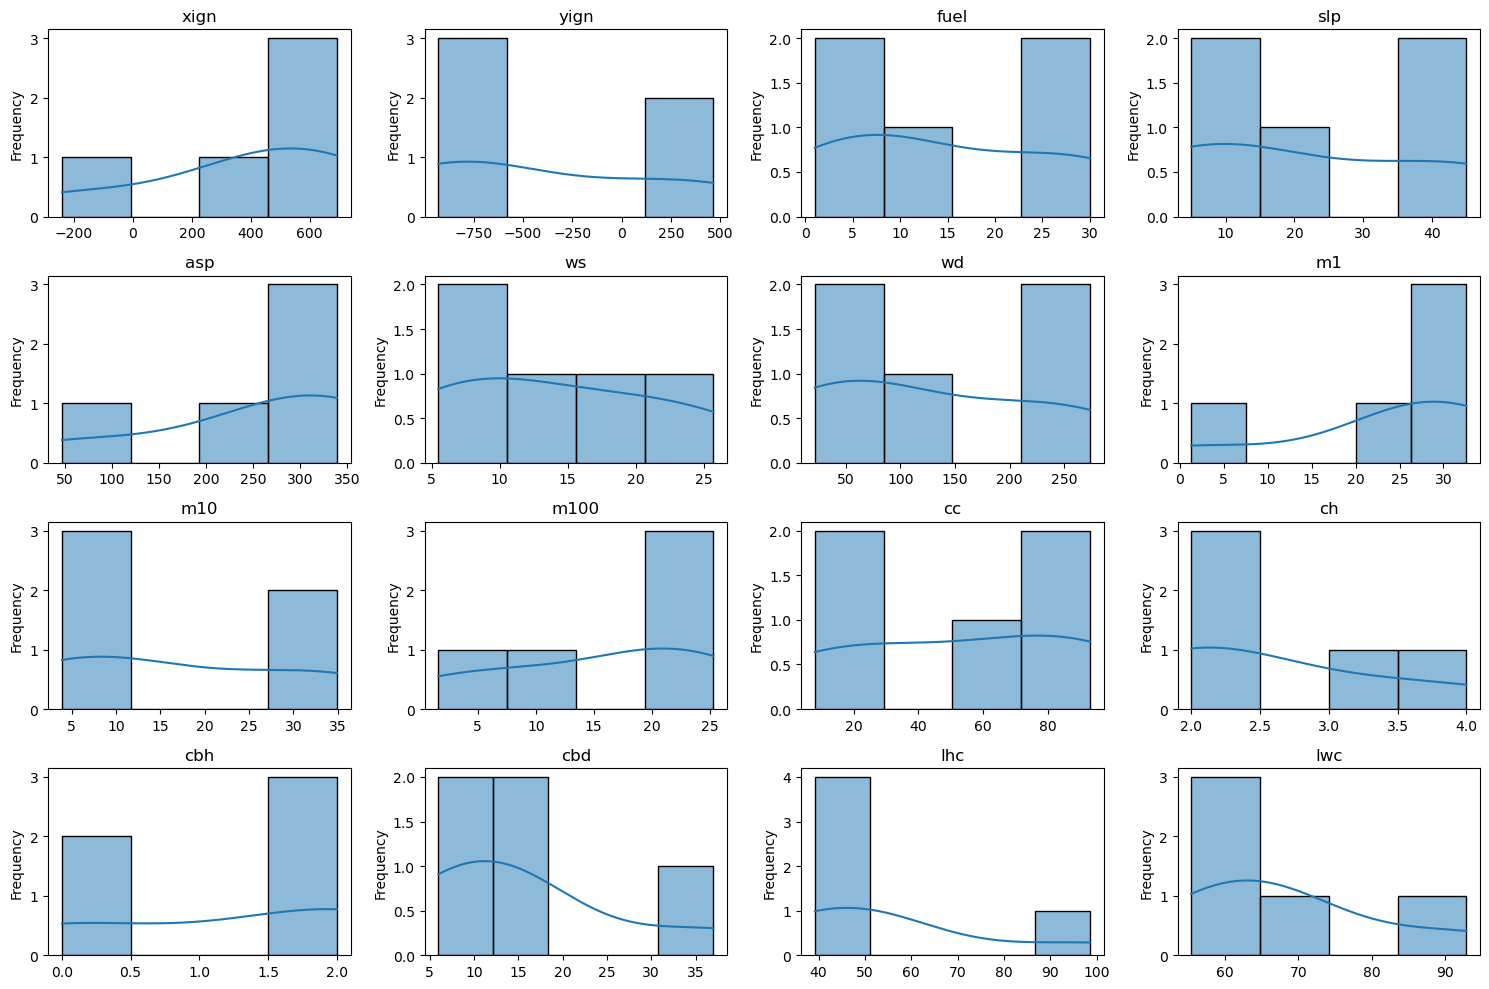

In [6]:
analysis_fcns.plot_input_distribution()

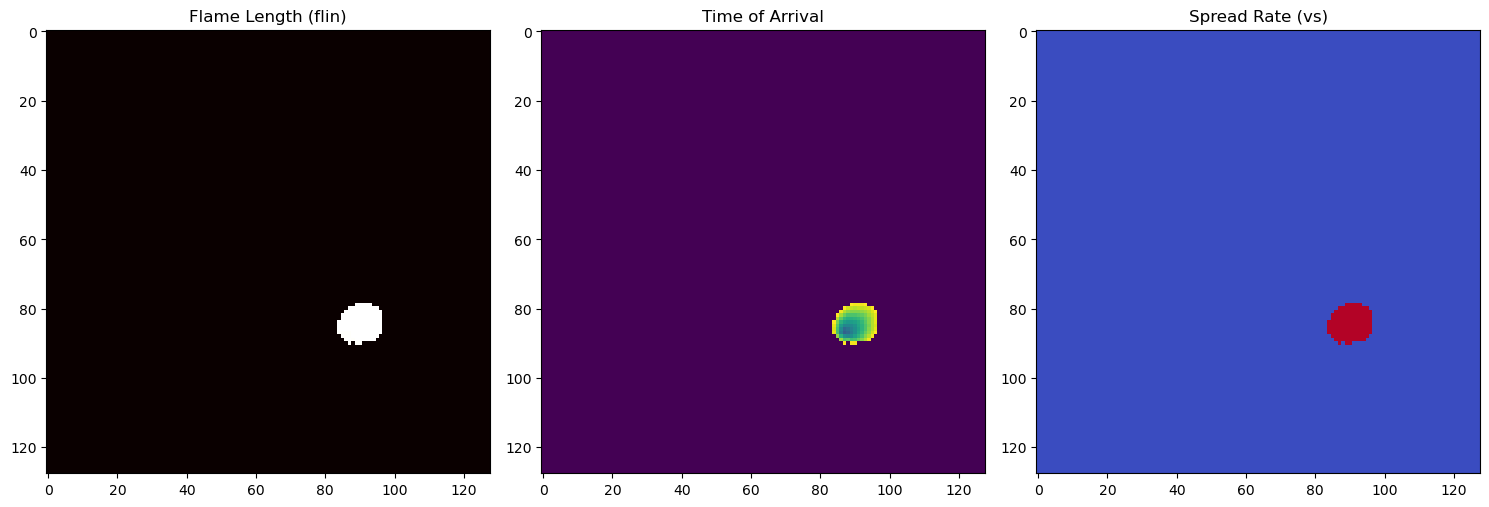

In [12]:
# plot the three rasters
flin_files = glob.glob(f"{output_dir}/flin_*.tif")
time_files = glob.glob(f"{output_dir}/time_of_arrival_*.tif")
vs_files = glob.glob(f"{output_dir}/vs_*.tif")

if flin_files and time_files and vs_files:
    flin_file = flin_files[0]
    time_file = time_files[0]
    vs_file = vs_files[0]

    with rasterio.open(flin_file) as src:
        flin_data = src.read(1)
    
    with rasterio.open(time_file) as src:
        time_data = src.read(1)
    
    with rasterio.open(vs_file) as src:
        vs_data = src.read(1)

    # Plotting the rasters
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    axs[0].imshow(flin_data, cmap='hot')
    axs[0].set_title('Flame Length (flin)')
    
    axs[1].imshow(time_data, cmap='viridis')
    axs[1].set_title('Time of Arrival')
    
    axs[2].imshow(vs_data, cmap='coolwarm')
    axs[2].set_title('Spread Rate (vs)')
    
    plt.tight_layout()
    plt.show()
else:
    print("One or more output files not found. Please check the output directory and file patterns.")

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import os

# Configuration - update these paths
output_dir = "./outputs"  # Change to your simulation directory

# File paths
flin_file = os.path.join(output_dir, f"flin_*.tif")
time_file = os.path.join(output_dir, f"time_of_arrival_*.tif")
vs_file = os.path.join(output_dir, f"vs_*.tif")

def read_and_clean_raster(filepath):
    """Read raster and handle nodata values"""
    with rasterio.open(filepath) as src:
        data = src.read(1)
        # Replace nodata with NaN
        data = np.where(data == -9999, np.nan, data)
        return data, src.meta

print("=== ELMFIRE Output Quick Check ===\n")

# Check if files exist
files_to_check = [
    ("Fire Line Intensity", flin_file),
    ("Time of Arrival", time_file), 
    ("Spread Velocity", vs_file)
]

available_files = []
for name, filepath in files_to_check:
    if os.path.exists(filepath):
        print(f"✅ {name}: Found")
        available_files.append((name, filepath))
    else:
        print(f"❌ {name}: Not found - {filepath}")

if not available_files:
    print("\n❌ No output files found! Check your paths.")
else:
    print(f"\n📊 Reading {len(available_files)} raster files...\n")
    
    # Create plots
    fig, axes = plt.subplots(1, len(available_files), figsize=(5*len(available_files), 4))
    if len(available_files) == 1:
        axes = [axes]  # Make it iterable for single plot
    
    for i, (name, filepath) in enumerate(available_files):
        # Read data
        data, meta = read_and_clean_raster(filepath)
        
        # Print statistics
        print(f"=== {name.upper()} ===")
        print(f"Shape: {data.shape}")
        print(f"Min: {np.nanmin(data):.2f}")
        print(f"Max: {np.nanmax(data):.2f}")
        print(f"Mean: {np.nanmean(data):.2f}")
        print(f"Valid pixels: {np.sum(~np.isnan(data))}")
        print()
        
        # Plot
        ax = axes[i]
        
        # Choose colormap based on variable
        if 'flin' in filepath.lower():
            # Fire line intensity - use log scale and hot colors
            data_plot = np.log10(np.maximum(data, 1))  # Avoid log(0)
            im = ax.imshow(data_plot, cmap='hot', origin='lower')
            ax.set_title(f'{name}\n(log scale)')
            cbar = plt.colorbar(im, ax=ax)
            cbar.set_label('log10(FLIN)')
        elif 'time' in filepath.lower():
            # Time of arrival - use plasma colors
            im = ax.imshow(data, cmap='plasma', origin='lower')
            ax.set_title(f'{name}')
            cbar = plt.colorbar(im, ax=ax)
            cbar.set_label('Time (seconds)')
        elif 'vs' in filepath.lower():
            # Spread velocity - use coolwarm colors
            im = ax.imshow(data, cmap='viridis', origin='lower')
            ax.set_title(f'{name}')
            cbar = plt.colorbar(im, ax=ax)
            cbar.set_label('Velocity (m/min)')
        
        ax.set_xlabel('X (pixels)')
        ax.set_ylabel('Y (pixels)')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate burned area
    if any('time' in fp for _, fp in available_files):
        time_data, _ = read_and_clean_raster(time_file)
        burned_pixels = np.sum(~np.isnan(time_data))
        burned_area_acres = (burned_pixels * 30 * 30) / 4047  # 30m pixels to acres
        print(f"🔥 Burned Area: {burned_area_acres:.1f} acres ({burned_pixels} pixels)")
    
    print("\n✅ Analysis complete!")

=== ELMFIRE Output Quick Check ===

❌ Fire Line Intensity: Not found - ./outputs/flin_*.tif
❌ Time of Arrival: Not found - ./outputs/time_of_arrival_*.tif
❌ Spread Velocity: Not found - ./outputs/vs_*.tif

❌ No output files found! Check your paths.


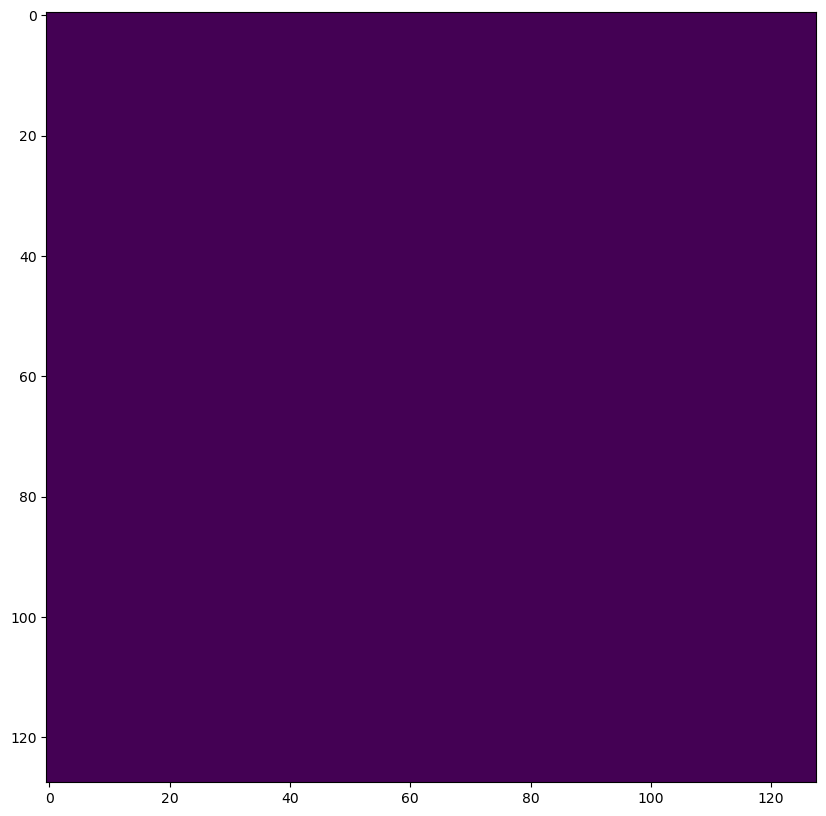

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

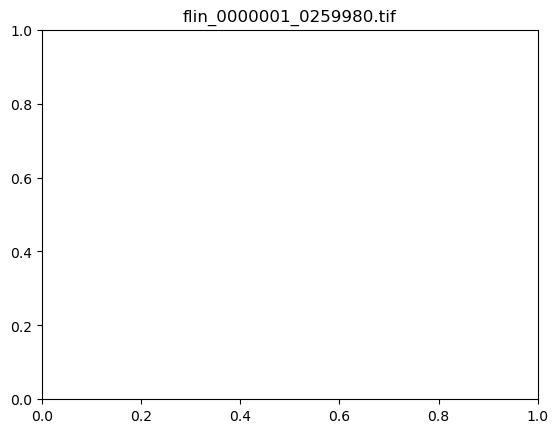

In [3]:
outpus_dir = './outputs'
# from output directory read these rasters flin_0000001_0259980.tif,
# time_of_arrival_0000001_0259980.tif, vs_0000001_0259980.tif
rasters = [
    'flin_0000001_0259980.tif',
    'time_of_arrival_0000001_0259980.tif',
    'vs_0000001_0259980.tif'
]
for raster in rasters:
    raster_path = os.path.join(outpus_dir, raster)
    with rasterio.open(raster_path) as src:
        data = src.read(1)
        plt.figure(figsize=(10, 10))
        show(data, cmap=cm.viridis)
        plt.title(raster)
        plt.colorbar()
        plt.show()
        print(f"Raster {raster} has shape {data.shape} and dtype {data.dtype}")
        print(f"Raster {raster} has min {data.min()} and max {data.max()}")
        print(f"Raster {raster} has no data value {src.nodata}")